In [18]:
import pandas as pd
import numpy as np
import random

data = {'readdatetime' : pd.date_range(start='1/15/2018',
                                  end='02/14/2018', 
                                  freq='D')\
                     .append(pd.date_range(start='1/15/2018',
                                           end='02/14/2018',
                                           freq='D')),
        'house' : ['house1' for i in range(31)] 
                  + ['house2' for i in range(31)],
        'readvalue' : [0.5 + 0.5*np.sin(2*np.pi/30*i) 
                       for i in range(31)]\
                     + [0.5 + 0.5*np.cos(2*np.pi/30*i) 
                       for i in range(31)]}
                       
df0 = pd.DataFrame(data, columns = ['readdatetime', 
                                    'house', 
                                    'readvalue'])# Randomly drop half the reads


random.seed(42)
df0 = df0.drop(random.sample(range(df0.shape[0]),
                             k=int(df0.shape[0]/2)))

print(df0)



   readdatetime   house  readvalue
0    2018-01-15  house1   0.500000
3    2018-01-18  house1   0.793893
4    2018-01-19  house1   0.871572
9    2018-01-24  house1   0.975528
10   2018-01-25  house1   0.933013
11   2018-01-26  house1   0.871572
16   2018-01-31  house1   0.396044
18   2018-02-02  house1   0.206107
19   2018-02-03  house1   0.128428
20   2018-02-04  house1   0.066987
21   2018-02-05  house1   0.024472
22   2018-02-06  house1   0.002739
23   2018-02-07  house1   0.002739
24   2018-02-08  house1   0.024472
25   2018-02-09  house1   0.066987
29   2018-02-13  house1   0.396044
30   2018-02-14  house1   0.500000
31   2018-01-15  house2   1.000000
33   2018-01-17  house2   0.956773
36   2018-01-20  house2   0.750000
39   2018-01-23  house2   0.447736
42   2018-01-26  house2   0.165435
45   2018-01-29  house2   0.010926
46   2018-01-30  house2   0.000000
50   2018-02-03  house2   0.165435
51   2018-02-04  house2   0.250000
52   2018-02-05  house2   0.345492
54   2018-02-07  hou

In [21]:
df = df0.copy()
df['readdatetime'] = pd.to_datetime(df['readdatetime'])
df.index = df['readdatetime']
del df['readdatetime']

In [24]:
df_interpol = df.groupby('house')\
                .resample('D')\
                .mean()
df_interpol['readvalue'] = df_interpol['readvalue'].interpolate()
df_interpol.head(60)

readvalue
house  readdatetime           
house1 2018-01-15     0.500000
       2018-01-16     0.597964
       2018-01-17     0.695928
       2018-01-18     0.793893
       2018-01-19     0.871572
       2018-01-20     0.892364
       2018-01-21     0.913155
       2018-01-22     0.933946
       2018-01-23     0.954737
       2018-01-24     0.975528
       2018-01-25     0.933013
       2018-01-26     0.871572
       2018-01-27     0.776467
       2018-01-28     0.681361
       2018-01-29     0.586255
       2018-01-30     0.491150
       2018-01-31     0.396044
       2018-02-01     0.301076
       2018-02-02     0.206107
       2018-02-03     0.128428
       2018-02-04     0.066987
       2018-02-05     0.024472
       2018-02-06     0.002739
       2018-02-07     0.002739
       2018-02-08     0.024472
       2018-02-09     0.066987
       2018-02-10     0.149252
       2018-02-11     0.231516
       2018-02-12     0.313780
       2018-02-13     0.396044
       2018-02-14     0.500000
house2 2018-01-15     1.000000
       2018-01-16     0.978386
       2018-01-17     0.956773
       2018-01-18     0.887848
       2018-01-19     0.818924
       2018-01-20     0.750000
       2018-01-21     0.649245
       2018-01-22     0.548491
       2018-01-23     0.447736
       2018-01-24     0.353635
       2018-01-25     0.259535
       2018-01-26     0.165435
       2018-01-27     0.113932
       2018-01-28     0.062429
       2018-01-29     0.010926
       2018-01-30     0.000000
       2018-01-31     0.041359
       2018-02-01     0.082717
       2018-02-02     0.124076
       2018-02-03     0.165435
       2018-02-04     0.250000
       2018-02-05     0.345492
       2018-02-06     0.448878
       2018-02-07     0.552264
       2018-02-08     0.651132
       2018-02-09     0.750000
       2018-02-10     0.809768
       2018-02-11     0.869537
       2018-02-12     0.929305

(8,)
(100,)


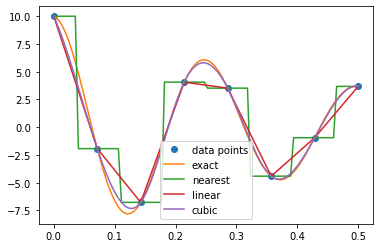

In [27]:
import numpy as np
from scipy.interpolate import interp1d
import pylab

A, nu, k = 10, 4, 2

def f(x, A, nu, k):
    return A * np.exp(-k*x) * np.cos(2*np.pi * nu * x)

xmax, nx = 0.5, 8
x = np.linspace(0, xmax, nx)
y = f(x, A, nu, k)

f_nearest = interp1d(x, y, kind='nearest')
f_linear  = interp1d(x, y)
f_cubic   = interp1d(x, y, kind='cubic')

x2 = np.linspace(0, xmax, 100)
print(x.shape)
print(x2.shape)
pylab.plot(x, y, 'o', label='data points')
pylab.plot(x2, f(x2, A, nu, k), label='exact')
pylab.plot(x2, f_nearest(x2), label='nearest')
pylab.plot(x2, f_linear(x2), label='linear')
pylab.plot(x2, f_cubic(x2), label='cubic')
pylab.legend()
pylab.show()

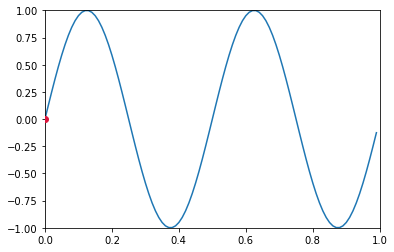

In [1]:
import matplotlib.pyplot as plt
import matplotlib.widgets as widgets
import numpy as np



class SnaptoCursor(object):
    def __init__(self, ax, x, y):
        self.ax = ax
        self.ly = ax.axvline(color='k', alpha=0.2)  # the vert line
        self.marker, = ax.plot([0],[0], marker="o", color="crimson", zorder=3) 
        self.x = x
        self.y = y
        self.txt = ax.text(0.7, 0.9, '')

    def mouse_move(self, event):
        if not event.inaxes: return
        x, y = event.xdata, event.ydata
        indx = np.searchsorted(self.x, [x])[0]
        x = self.x[indx]
        y = self.y[indx]
        self.ly.set_xdata(x)
        self.marker.set_data([x],[y])
        self.txt.set_text('x=%1.2f, y=%1.2f' % (x, y))
        self.txt.set_position((x,y))
        self.ax.figure.canvas.draw_idle()

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*2*np.pi*t)
fig, ax = plt.subplots()

#cursor = Cursor(ax)
cursor = SnaptoCursor(ax, t, s)
cid =  plt.connect('motion_notify_event', cursor.mouse_move)

ax.plot(t, s,)
plt.axis([0, 1, -1, 1])
plt.show()